In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split

In [52]:
pokemons = pd.read_csv('./data/pokemon.csv', index_col='#')
combats = pd.read_csv('./data/combats.csv')

In [53]:
print('Количество покемонов: {}'.format(len(pokemons)))

Количество покемонов: 800


In [54]:
print('Количество битв: {}'.format(len(combats)))

Количество битв: 50000


Информация о датасете

In [55]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 60.2+ KB


In [56]:
pokemons.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [57]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [197]:
combats.head()[["First_pokemon", "Second_pokemon", "Winner"]]

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


# Информация о данных

### Набор данных 1 - информация о покемонах

**Name** - Имя покемона <br>
**Type 1** - Тип покемона <br>
**Type 2** - Дополнительный тип покемона<br>
**HP** - Количество здоровья<br>
**Attack** - Сила атаки<br>
**Defense** - Уровень защиты<br>
**Sp. Atk** - Сила специальной атаки<br>
**Sp. Def** - Уровень специальной защиты<br>
**Speed** - Скорость<br>
**Generation** - Поколение<br>
**Legendary** - Легендарный или нет

### Набор данных 2 - информация о битвах

**First_pokemon** - Первый покемон, участвующий в битве <br>
**Second_pokemon** - Второй покемон, участвующий в битве <br>
**Winner** - Победитель<br>

# Очистка данных

### Удаляем пробелы в данных

Количество пустых значений

In [58]:
pokemons.isnull().sum()

Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Есть одна строка, в которой имя покемона пустое.
Мы не можем восстановить эти данные, поэтому просто удаляем строку

In [59]:
pokemons = pokemons.dropna(subset=['Name'])
pokemons.isnull().sum()

Name            0
Type 1          0
Type 2        385
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Покемоны бывают разных типов

У всех покемонов есть как минимум один тип, у некоторых есть второй

Мы не можем просто удалить все строки с нулевым значением для Типа 2, т.к. их много, так что нам нужно заполнить пустые значения в столбце "Type 2"

In [60]:
pokemons = pokemons.fillna(value='None')

In [61]:
pokemons.isnull().sum()

Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

### Исправляем типы данных 

In [62]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 1 to 800
Data columns (total 11 columns):
Name          799 non-null object
Type 1        799 non-null object
Type 2        799 non-null object
HP            799 non-null int64
Attack        799 non-null int64
Defense       799 non-null int64
Sp. Atk       799 non-null int64
Sp. Def       799 non-null int64
Speed         799 non-null int64
Generation    799 non-null int64
Legendary     799 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 60.1+ KB


Столбец **Legendary** имеет тип bool, который плохо подходит для предобработки

Заменим его на бинарный тип (True -> 1, False -> 0)

In [63]:
pokemons['Legendary'] = pokemons['Legendary'].astype(int)

### Удаляем дубликаты покемонов

Количество уникальных покемонов в наборе:

In [64]:
len(pokemons['Name'].unique())

799

Дубликатов нет!

# EDA

Матрица корелляции (проверка зависимости между различными величинами)

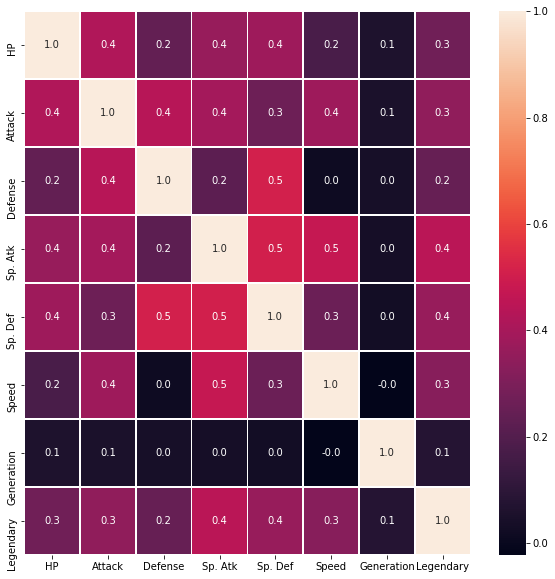

In [65]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=pokemons.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Распределение основных типов покемонов

[Text(0, 0, 'Grass'),
 Text(0, 0, 'Fire'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Bug'),
 Text(0, 0, 'Normal'),
 Text(0, 0, 'Poison'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Ground'),
 Text(0, 0, 'Fairy'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Psychic'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Ghost'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Dragon'),
 Text(0, 0, 'Dark'),
 Text(0, 0, 'Steel'),
 Text(0, 0, 'Flying')]

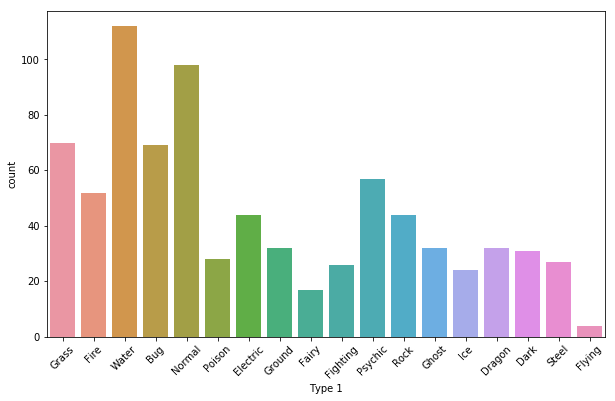

In [66]:
plt.subplots(figsize=(10, 6))
cp = sns.countplot(x='Type 1', data=pokemons)
_, labels = plt.xticks()
cp.set_xticklabels(labels=labels, rotation=45)

Распределение дополнительных типов покемонов

[Text(0, 0, 'Poison'),
 Text(0, 0, 'None'),
 Text(0, 0, 'Flying'),
 Text(0, 0, 'Dragon'),
 Text(0, 0, 'Ground'),
 Text(0, 0, 'Fairy'),
 Text(0, 0, 'Grass'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Psychic'),
 Text(0, 0, 'Steel'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Dark'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Fire'),
 Text(0, 0, 'Ghost'),
 Text(0, 0, 'Bug'),
 Text(0, 0, 'Normal')]

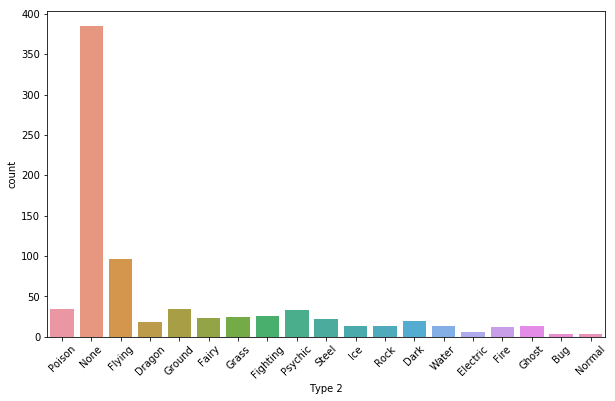

In [67]:
plt.subplots(figsize=(10, 6))
cp = sns.countplot(x='Type 2', data=pokemons)
_, labels = plt.xticks()
cp.set_xticklabels(labels=labels, rotation=45)

Графики распределния атаки и защиты

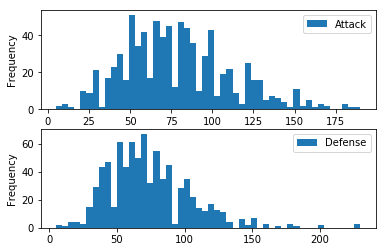

In [68]:
fig, axes = plt.subplots(nrows=2,ncols=1)
pokemons.plot(kind = "hist",y = "Attack",bins = 50, ax = axes[0])
pokemons.plot(kind = "hist",y = "Defense",bins = 50,ax = axes[1])

plt.show()

График зависимости между атакой и защитой

Text(0.5, 1.0, 'Attack/Defense Scatter Plot')

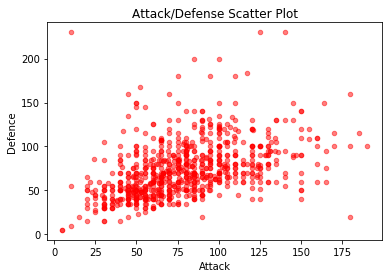

In [69]:
# Scatter Plot 
# x = attack, y = defense
pokemons.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack/Defense Scatter Plot')       

Функция для получения данных покемона по его имени (упростит работу)

In [70]:
def get_pokemon_by_name(pokemon_name):
    return pokemons[pokemons['Name'] == pokemon_name]

## Создание новых признаков (feature engineering)

### Количество побед и поражений

Добавим в информацию о покемонах количество побед и поражений

In [71]:
# Функция для получения количества побед для определенного покемона
def get_pokemon_wins(pokemon_name):
    index = get_pokemon_by_name(pokemon_name).index.item()
    return len(combats[combats['Winner']==index])

In [72]:
def get_pokemon_loses(pokemon_name):
    index = get_pokemon_by_name(pokemon_name).index.item()
    pokemon_combats = combats[(combats['First_pokemon'] == index) | (combats['Second_pokemon'] == index)]
    pokemons_loses = len(pokemon_combats[pokemon_combats['Winner']!=index])
    return pokemons_loses

Проверим функции

In [73]:
get_pokemon_wins('Pikachu')

93

In [74]:
get_pokemon_loses('Pikachu')

43

In [75]:
pokemons['Wins_count'] = pokemons.apply(lambda row: get_pokemon_wins(row['Name']), axis=1)
pokemons['Loses_count'] = pokemons.apply(lambda row: get_pokemon_loses(row['Name']), axis=1)

#### ТОП-10 покемонов по победам:

In [76]:
for pokemon in list(pokemons.sort_values(by=['Wins_count'], ascending=False)['Name'][:10]):
    print(pokemon)

Mewtwo
Aerodactyl
Infernape
Jirachi
Slaking
Deoxys Speed Forme
Mega Absol
Murkrow
Mega Houndoom
Mega Aerodactyl


### Лучший покемон - Mewtwo!

![title](./images/mewtwo.png)

### Объединяем наборы данных

Удалим из информации о битвах все битвы, в которых участвовали покемоны, не присутствующие в нашем наборе покемонов

In [77]:
indexes = list(pokemons.index)

combats = combats[(combats['First_pokemon'].isin(indexes)) & (combats['Second_pokemon'].isin(indexes))]

In [78]:
pokemon_data = list(pokemons.columns)

In [79]:
# Функция для получения определенного параметра покемона по его номеру
def get_feature_by_index(index, feature):
    pokemon = pokemons.loc[index]
    return pokemon[feature]

In [80]:
get_feature_by_index(1, 'Name')

'Bulbasaur'

**ATTENTION!!** Long calculations!

In [81]:
for column in pokemon_data:
    combats['pokemon1_'+column] = combats.apply(lambda row: get_feature_by_index(row['First_pokemon'], column), axis=1)
    combats['pokemon2_'+column] = combats.apply(lambda row: get_feature_by_index(row['Second_pokemon'], column), axis=1)

In [82]:
combats.to_pickle('./combats_after_merge.pkl')
pokemons.to_pickle('./pokemons_after_merge.pkl')

In [83]:
combats = pd.read_pickle("./combats_after_merge.pkl")
pokemons = pd.read_pickle("./pokemons_after_merge.pkl")

### One-Hot encoding для типов покемонов

In [84]:
combats.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner', 'pokemon1_Name',
       'pokemon2_Name', 'pokemon1_Type 1', 'pokemon2_Type 1',
       'pokemon1_Type 2', 'pokemon2_Type 2', 'pokemon1_HP', 'pokemon2_HP',
       'pokemon1_Attack', 'pokemon2_Attack', 'pokemon1_Defense',
       'pokemon2_Defense', 'pokemon1_Sp. Atk', 'pokemon2_Sp. Atk',
       'pokemon1_Sp. Def', 'pokemon2_Sp. Def', 'pokemon1_Speed',
       'pokemon2_Speed', 'pokemon1_Generation', 'pokemon2_Generation',
       'pokemon1_Legendary', 'pokemon2_Legendary', 'pokemon1_Wins_count',
       'pokemon2_Wins_count', 'pokemon1_Loses_count', 'pokemon2_Loses_count'],
      dtype='object')

In [85]:
combats = pd.get_dummies(combats, prefix='pokemon1_type1', columns=['pokemon1_Type 1'])
combats = pd.get_dummies(combats, prefix='pokemon1_type2', columns=['pokemon1_Type 2'])
combats = pd.get_dummies(combats, prefix='pokemon2_type1', columns=['pokemon2_Type 1'])
combats = pd.get_dummies(combats, prefix='pokemon2_type2', columns=['pokemon2_Type 2'])

# делаем то же самое для набора данных с покемонами
pokemons = pd.get_dummies(pokemons, prefix='type1', columns=['Type 1'])
pokemons = pd.get_dummies(pokemons, prefix='type2', columns=['Type 2'])

In [86]:
combats.to_pickle('./combats_with_dummies.pkl')
pokemons.to_pickle('./pokemons_with_dummies.pkl')

In [87]:
combats = pd.read_pickle("./combats_with_dummies.pkl")
pokemons = pd.read_pickle("./pokemons_with_dummies.pkl")

### Генерируем новые фичи на основе разницы в старых

In [88]:
combats['HP_diff'] = combats['pokemon1_HP'].sub(combats['pokemon2_HP'])
combats = combats.drop(columns=['pokemon1_HP', 'pokemon2_HP'])

combats['Attack_diff'] = combats['pokemon1_Attack'].sub(combats['pokemon2_Attack'])
combats = combats.drop(columns=['pokemon1_Attack', 'pokemon2_Attack'])

combats['Defence_diff'] = combats['pokemon1_Defense'].sub(combats['pokemon2_Defense'])
combats = combats.drop(columns=['pokemon1_Defense', 'pokemon2_Defense'])

combats['sp_atk_diff'] = combats['pokemon1_Sp. Atk'].sub(combats['pokemon2_Sp. Atk'])
combats = combats.drop(columns=['pokemon1_Sp. Atk', 'pokemon2_Sp. Atk'])

combats['sp_def_diff'] = combats['pokemon1_Sp. Def'].sub(combats['pokemon2_Sp. Def'])
combats = combats.drop(columns=['pokemon1_Sp. Def', 'pokemon2_Sp. Def'])

combats['speed_diff'] = combats['pokemon1_Speed'].sub(combats['pokemon2_Speed'])
combats = combats.drop(columns=['pokemon1_Speed', 'pokemon2_Speed'])

In [89]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49892 entries, 0 to 49999
Data columns (total 93 columns):
First_pokemon              49892 non-null int64
Second_pokemon             49892 non-null int64
Winner                     49892 non-null int64
pokemon1_Name              49892 non-null object
pokemon2_Name              49892 non-null object
pokemon1_Generation        49892 non-null int64
pokemon2_Generation        49892 non-null int64
pokemon1_Legendary         49892 non-null int64
pokemon2_Legendary         49892 non-null int64
pokemon1_Wins_count        49892 non-null int64
pokemon2_Wins_count        49892 non-null int64
pokemon1_Loses_count       49892 non-null int64
pokemon2_Loses_count       49892 non-null int64
pokemon1_type1_Bug         49892 non-null uint8
pokemon1_type1_Dark        49892 non-null uint8
pokemon1_type1_Dragon      49892 non-null uint8
pokemon1_type1_Electric    49892 non-null uint8
pokemon1_type1_Fairy       49892 non-null uint8
pokemon1_type1_Fighting  

### Изменяем целевую переменную

In [90]:
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

c:\users\anton.krautsevich\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\anton.krautsevich\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Создаем датасет для тренировки, удаляя ненужные признаки

In [96]:
train_dataset = combats.drop(columns=[
    'First_pokemon', 
    'Second_pokemon',
    'pokemon1_Name',
    'pokemon2_Name'
])

# Создание, обучение и тестирование модели

### Делим данные на тестовые и тренировочные

In [97]:
y_train_full = train_dataset['Winner']
x_train_full = train_dataset.drop('Winner', axis=1)

In [98]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

## Выбираем модель

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

clf_dict = {'log reg': LogisticRegression(), 
            'naive bayes': GaussianNB(), 
            'random forest': RandomForestClassifier(n_estimators=100),
            'knn': KNeighborsClassifier(),
            'linear svc': LinearSVC(),
            'ada boost': AdaBoostClassifier(n_estimators=100),
            'gradient boosting': GradientBoostingClassifier(n_estimators=100),
            'CART': DecisionTreeClassifier()}

for name, clf in clf_dict.items():
    model = clf.fit(x_train, y_train)
    pred = model.predict(x_cv)
    print('Accuracy of {}:'.format(name), accuracy_score(pred, y_cv))

c:\users\anton.krautsevich\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of log reg: 0.8935300248536839
Accuracy of naive bayes: 0.7587589192656137
Accuracy of random forest: 0.961196183756915
Accuracy of knn: 0.905796520484246


c:\users\anton.krautsevich\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy of linear svc: 0.7541890483444239
Accuracy of ada boost: 0.9456425879900585
Accuracy of gradient boosting: 0.9615168764531388
Accuracy of CART: 0.9615168764531388


### Лучшая модель - градиентный бустинг

## Обучаем лучшую модель на полном наборе данных

In [101]:
gboost = GradientBoostingClassifier(n_estimators=100)
model = gboost.fit(x_train_full, y_train_full)

Сохраним модель в файле для последующего использования

In [103]:
pickle.dump(model, open('gboost.pkl', 'wb'))

# Проверка работы модели

#### Создадим функцию, которая будет принимать на вход имена двух покемонов, а на выходе выдавать победителя, основываясь на предсказании модели

In [144]:
def predict_winner(pokemon1_name, pokemon2_name):
    pokemon1 = get_pokemon_by_name(pokemon1_name).reset_index(drop=True)
    pokemon2 = get_pokemon_by_name(pokemon2_name).reset_index(drop=True)
    pokemon1 = pokemon1.add_prefix('pokemon1_')
    pokemon2 = pokemon2.add_prefix('pokemon2_')
    test_data = pd.concat([pokemon1, pokemon2], axis=1, sort=False).drop(columns=['pokemon1_Name','pokemon2_Name'])
    test_data['HP_diff'] = test_data['pokemon1_HP'].sub(test_data['pokemon2_HP'])
    test_data = test_data.drop(columns=['pokemon1_HP', 'pokemon2_HP'])
    test_data['Attack_diff'] = test_data['pokemon1_Attack'].sub(test_data['pokemon2_Attack'])
    test_data = test_data.drop(columns=['pokemon1_Attack', 'pokemon2_Attack'])
    test_data['Defence_diff'] = test_data['pokemon1_Defense'].sub(test_data['pokemon2_Defense'])
    test_data = test_data.drop(columns=['pokemon1_Defense', 'pokemon2_Defense'])
    test_data['sp_atk_diff'] = test_data['pokemon1_Sp. Atk'].sub(test_data['pokemon2_Sp. Atk'])
    test_data = test_data.drop(columns=['pokemon1_Sp. Atk', 'pokemon2_Sp. Atk'])
    test_data['sp_def_diff'] = test_data['pokemon1_Sp. Def'].sub(test_data['pokemon2_Sp. Def'])
    test_data = test_data.drop(columns=['pokemon1_Sp. Def', 'pokemon2_Sp. Def'])
    test_data['speed_diff'] = test_data['pokemon1_Speed'].sub(test_data['pokemon2_Speed'])
    test_data = test_data.drop(columns=['pokemon1_Speed', 'pokemon2_Speed'])
    result = model.predict_proba(test_data)
    return result

In [146]:
predict_winner('Pikachu', 'Mewtwo')

array([[0.05963237, 0.94036763]])